**Comp 646 Final Report**
<Br>
**Project : Stegano-LLM**
<br>
Name : Divit Patidar
<br>
NetID : DP78

In [ ]:
!pip install transformers

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import base64
from PIL import Image
import warnings
import cv2
import base64
import io
import json
import re
import zipfile
import numpy as np
import csv
from glob import glob
from transformers import AutoTokenizer, AutoModelForCausalLM
from google.colab import drive
warnings.filterwarnings('ignore')
# Mounting the Google Drive
drive.mount('/content/drive')

# Accessing the dataset Folder
folder_path = '/content/drive/My Drive/gray'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive


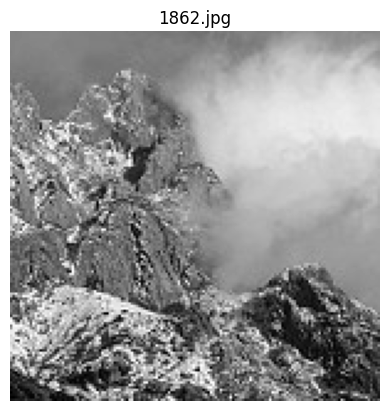

In [ ]:
# Mounting the Google Drive
drive.mount('/content/drive')

# Accessing the dataset Folder
folder_path = '/content/drive/My Drive/gray'
image_files = os.listdir(folder_path)

# Function to read and display an image from the dataset, the images have been fortmatted to grayscale.
def display_image(file):
    image_path = os.path.join(folder_path, file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(file)
    plt.axis('off')
    plt.show()

# Step 3: Display the first image as an example
if image_files:
    display_image(image_files[0])


In [ ]:
# Inatilizing the models
tokenizer = AutoTokenizer.from_pretrained("databricks/dolly-v2-3b")
model = AutoModelForCausalLM.from_pretrained("databricks/dolly-v2-3b")

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

In [ ]:
# Directory containing the images
image_directory = '/content/drive/My Drive/gray'

# Confirming the path and list files
if os.path.exists(image_directory):
    print("Listing files in the directory:")
    print(os.listdir(image_directory))
else:
    print("Directory does not exist. Check the path.")


Listing files in the directory:
['498.jpg', '326.jpg', '137.jpg', '383.jpg', '4.jpg', '241.jpg', '48.jpg', '146.jpg', '365.jpg', '361.jpg', '194.jpg', '447.jpg', '387.jpg', '56.jpg', '38.jpg', '86.jpg', '124.jpg', '166.jpg', '268.jpg', '312.jpg', '445.jpg', '335.jpg', '277.jpg', '496.jpg', '121.jpg', '369.jpg', '256.jpg', '100.jpg', '274.jpg', '416.jpg', '491.jpg', '238.jpg', '143.jpg', '345.jpg', '408.jpg', '120.jpg', '105.jpg', '58.jpg', '463.jpg', '93.jpg', '181.jpg', '446.jpg', '394.jpg', '237.jpg', '276.jpg', '417.jpg', '333.jpg', '313.jpg', '80.jpg', '171.jpg', '78.jpg', '449.jpg', '259.jpg', '440.jpg', '301.jpg', '479.jpg', '197.jpg', '141.jpg', '354.jpg', '160.jpg', '249.jpg', '57.jpg', '9.jpg', '264.jpg', '158.jpg', '41.jpg', '35.jpg', '217.jpg', '344.jpg', '174.jpg', '139.jpg', '215.jpg', '377.jpg', '159.jpg', '415.jpg', '64.jpg', '484.jpg', '483.jpg', '376.jpg', '481.jpg', '232.jpg', '155.jpg', '212.jpg', '390.jpg', '251.jpg', '281.jpg', '459.jpg', '323.jpg', '26.jpg', '269.

In [ ]:
# Converting image to base64 encoded string.
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

# Converting all images in the directory to base64 and save with names to a CSV file
def images_to_csv(directory, csv_file_path):
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'base64'])  # Writing the header row with 'base64' as column name

        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                print(f"Processing file: {filename}")
                image_path = os.path.join(directory, filename)
                base64_data = image_to_base64(image_path)
                writer.writerow([filename, base64_data])
                print(f"Written {filename} to CSV")


In [ ]:
# Defining the image directory and output CSV path
image_directory = '/content/drive/My Drive/gray'
csv_output_path = '/content/drive/My Drive/image_base64.csv'

# Process the images and save to CSV
images_to_csv(image_directory, csv_output_path)


In [ ]:
# Generating a random prompt for an image using the language model ( LLM ) Dolly-v-3B from databricks
def generate_prompt(image_name):
    input_text = f"Describe the image: {image_name} in an artistic way."
    inputs = tokenizer(input_text, return_tensors="pt")
    outputs = model.generate(**inputs, max_length=50)
    prompt = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return prompt

# Converting all images in the directory to base64, generate prompts, and save with names to a CSV file
def images_to_csv_with_prompts(directory, csv_file_path):
    """."""
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Base64', 'Prompt'])  # Include 'Prompt' in the header

        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                print(f"Processing file: {filename}")
                image_path = os.path.join(directory, filename)
                base64_data = image_to_base64(image_path)
                prompt = generate_prompt(filename)
                writer.writerow([filename, base64_data, prompt])
                print(f"Written data for {filename} to CSV with prompt.")

csv_output_path = '/content/drive/My Drive/image_base64_with_prompts.csv'

# Process the images and save to CSV with prompts
images_to_csv_with_prompts(image_directory, csv_output_path)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Processing file: 498.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 498.jpg to CSV with prompt.
Processing file: 326.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 326.jpg to CSV with prompt.
Processing file: 137.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 137.jpg to CSV with prompt.
Processing file: 383.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 383.jpg to CSV with prompt.
Processing file: 4.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 4.jpg to CSV with prompt.
Processing file: 241.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 241.jpg to CSV with prompt.
Processing file: 48.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 48.jpg to CSV with prompt.
Processing file: 146.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 146.jpg to CSV with prompt.
Processing file: 365.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 365.jpg to CSV with prompt.
Processing file: 361.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 361.jpg to CSV with prompt.
Processing file: 194.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 194.jpg to CSV with prompt.
Processing file: 447.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 447.jpg to CSV with prompt.
Processing file: 387.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 387.jpg to CSV with prompt.
Processing file: 56.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 56.jpg to CSV with prompt.
Processing file: 38.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 38.jpg to CSV with prompt.
Processing file: 86.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 86.jpg to CSV with prompt.
Processing file: 124.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 124.jpg to CSV with prompt.
Processing file: 166.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 166.jpg to CSV with prompt.
Processing file: 268.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 268.jpg to CSV with prompt.
Processing file: 312.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 312.jpg to CSV with prompt.
Processing file: 445.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 445.jpg to CSV with prompt.
Processing file: 335.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 335.jpg to CSV with prompt.
Processing file: 277.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 277.jpg to CSV with prompt.
Processing file: 496.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 496.jpg to CSV with prompt.
Processing file: 121.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 121.jpg to CSV with prompt.
Processing file: 369.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 369.jpg to CSV with prompt.
Processing file: 256.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 256.jpg to CSV with prompt.
Processing file: 100.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 100.jpg to CSV with prompt.
Processing file: 274.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 274.jpg to CSV with prompt.
Processing file: 416.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 416.jpg to CSV with prompt.
Processing file: 491.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 491.jpg to CSV with prompt.
Processing file: 238.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 238.jpg to CSV with prompt.
Processing file: 143.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 143.jpg to CSV with prompt.
Processing file: 345.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 345.jpg to CSV with prompt.
Processing file: 408.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 408.jpg to CSV with prompt.
Processing file: 120.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 120.jpg to CSV with prompt.
Processing file: 105.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 105.jpg to CSV with prompt.
Processing file: 58.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 58.jpg to CSV with prompt.
Processing file: 463.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 463.jpg to CSV with prompt.
Processing file: 93.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 93.jpg to CSV with prompt.
Processing file: 181.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 181.jpg to CSV with prompt.
Processing file: 446.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 446.jpg to CSV with prompt.
Processing file: 394.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 394.jpg to CSV with prompt.
Processing file: 237.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 237.jpg to CSV with prompt.
Processing file: 276.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 276.jpg to CSV with prompt.
Processing file: 417.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 417.jpg to CSV with prompt.
Processing file: 333.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 333.jpg to CSV with prompt.
Processing file: 313.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 313.jpg to CSV with prompt.
Processing file: 80.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 80.jpg to CSV with prompt.
Processing file: 171.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 171.jpg to CSV with prompt.
Processing file: 78.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 78.jpg to CSV with prompt.
Processing file: 449.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 449.jpg to CSV with prompt.
Processing file: 259.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 259.jpg to CSV with prompt.
Processing file: 440.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 440.jpg to CSV with prompt.
Processing file: 301.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 301.jpg to CSV with prompt.
Processing file: 479.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 479.jpg to CSV with prompt.
Processing file: 197.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 197.jpg to CSV with prompt.
Processing file: 141.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 141.jpg to CSV with prompt.
Processing file: 354.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 354.jpg to CSV with prompt.
Processing file: 160.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 160.jpg to CSV with prompt.
Processing file: 249.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 249.jpg to CSV with prompt.
Processing file: 57.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 57.jpg to CSV with prompt.
Processing file: 9.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 9.jpg to CSV with prompt.
Processing file: 264.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 264.jpg to CSV with prompt.
Processing file: 158.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 158.jpg to CSV with prompt.
Processing file: 41.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 41.jpg to CSV with prompt.
Processing file: 35.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 35.jpg to CSV with prompt.
Processing file: 217.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 217.jpg to CSV with prompt.
Processing file: 344.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 344.jpg to CSV with prompt.
Processing file: 174.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 174.jpg to CSV with prompt.
Processing file: 139.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 139.jpg to CSV with prompt.
Processing file: 215.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 215.jpg to CSV with prompt.
Processing file: 377.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 377.jpg to CSV with prompt.
Processing file: 159.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 159.jpg to CSV with prompt.
Processing file: 415.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 415.jpg to CSV with prompt.
Processing file: 64.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 64.jpg to CSV with prompt.
Processing file: 484.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 484.jpg to CSV with prompt.
Processing file: 483.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 483.jpg to CSV with prompt.
Processing file: 376.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 376.jpg to CSV with prompt.
Processing file: 481.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 481.jpg to CSV with prompt.
Processing file: 232.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 232.jpg to CSV with prompt.
Processing file: 155.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 155.jpg to CSV with prompt.
Processing file: 212.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 212.jpg to CSV with prompt.
Processing file: 390.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 390.jpg to CSV with prompt.
Processing file: 251.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 251.jpg to CSV with prompt.
Processing file: 281.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 281.jpg to CSV with prompt.
Processing file: 459.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 459.jpg to CSV with prompt.
Processing file: 323.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 323.jpg to CSV with prompt.
Processing file: 26.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 26.jpg to CSV with prompt.
Processing file: 269.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 269.jpg to CSV with prompt.
Processing file: 327.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 327.jpg to CSV with prompt.
Processing file: 331.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 331.jpg to CSV with prompt.
Processing file: 451.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 451.jpg to CSV with prompt.
Processing file: 284.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 284.jpg to CSV with prompt.
Processing file: 157.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 157.jpg to CSV with prompt.
Processing file: 297.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 297.jpg to CSV with prompt.
Processing file: 461.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 461.jpg to CSV with prompt.
Processing file: 425.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 425.jpg to CSV with prompt.
Processing file: 460.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 460.jpg to CSV with prompt.
Processing file: 195.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 195.jpg to CSV with prompt.
Processing file: 46.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 46.jpg to CSV with prompt.
Processing file: 11.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 11.jpg to CSV with prompt.
Processing file: 47.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 47.jpg to CSV with prompt.
Processing file: 475.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 475.jpg to CSV with prompt.
Processing file: 309.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 309.jpg to CSV with prompt.
Processing file: 74.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 74.jpg to CSV with prompt.
Processing file: 295.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 295.jpg to CSV with prompt.
Processing file: 307.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 307.jpg to CSV with prompt.
Processing file: 339.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 339.jpg to CSV with prompt.
Processing file: 154.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 154.jpg to CSV with prompt.
Processing file: 410.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 410.jpg to CSV with prompt.
Processing file: 380.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 380.jpg to CSV with prompt.
Processing file: 342.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 342.jpg to CSV with prompt.
Processing file: 66.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 66.jpg to CSV with prompt.
Processing file: 133.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 133.jpg to CSV with prompt.
Processing file: 115.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 115.jpg to CSV with prompt.
Processing file: 473.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 473.jpg to CSV with prompt.
Processing file: 373.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 373.jpg to CSV with prompt.
Processing file: 368.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 368.jpg to CSV with prompt.
Processing file: 127.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 127.jpg to CSV with prompt.
Processing file: 59.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 59.jpg to CSV with prompt.
Processing file: 303.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 303.jpg to CSV with prompt.
Processing file: 173.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 173.jpg to CSV with prompt.
Processing file: 490.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 490.jpg to CSV with prompt.
Processing file: 188.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 188.jpg to CSV with prompt.
Processing file: 287.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 287.jpg to CSV with prompt.
Processing file: 392.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 392.jpg to CSV with prompt.
Processing file: 142.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 142.jpg to CSV with prompt.
Processing file: 90.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 90.jpg to CSV with prompt.
Processing file: 360.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 360.jpg to CSV with prompt.
Processing file: 329.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 329.jpg to CSV with prompt.
Processing file: 298.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 298.jpg to CSV with prompt.
Processing file: 424.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 424.jpg to CSV with prompt.
Processing file: 21.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 21.jpg to CSV with prompt.
Processing file: 184.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 184.jpg to CSV with prompt.
Processing file: 396.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 396.jpg to CSV with prompt.
Processing file: 363.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 363.jpg to CSV with prompt.
Processing file: 250.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 250.jpg to CSV with prompt.
Processing file: 13.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 13.jpg to CSV with prompt.
Processing file: 325.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 325.jpg to CSV with prompt.
Processing file: 437.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 437.jpg to CSV with prompt.
Processing file: 69.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 69.jpg to CSV with prompt.
Processing file: 234.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 234.jpg to CSV with prompt.
Processing file: 302.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 302.jpg to CSV with prompt.
Processing file: 349.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 349.jpg to CSV with prompt.
Processing file: 202.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 202.jpg to CSV with prompt.
Processing file: 468.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 468.jpg to CSV with prompt.
Processing file: 183.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 183.jpg to CSV with prompt.
Processing file: 82.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 82.jpg to CSV with prompt.
Processing file: 227.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 227.jpg to CSV with prompt.
Processing file: 316.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 316.jpg to CSV with prompt.
Processing file: 25.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 25.jpg to CSV with prompt.
Processing file: 45.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 45.jpg to CSV with prompt.
Processing file: 439.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 439.jpg to CSV with prompt.
Processing file: 453.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 453.jpg to CSV with prompt.
Processing file: 201.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 201.jpg to CSV with prompt.
Processing file: 94.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 94.jpg to CSV with prompt.
Processing file: 255.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 255.jpg to CSV with prompt.
Processing file: 421.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 421.jpg to CSV with prompt.
Processing file: 261.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 261.jpg to CSV with prompt.
Processing file: 418.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 418.jpg to CSV with prompt.
Processing file: 114.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 114.jpg to CSV with prompt.
Processing file: 153.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 153.jpg to CSV with prompt.
Processing file: 229.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 229.jpg to CSV with prompt.
Processing file: 471.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 471.jpg to CSV with prompt.
Processing file: 33.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 33.jpg to CSV with prompt.
Processing file: 28.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 28.jpg to CSV with prompt.
Processing file: 99.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 99.jpg to CSV with prompt.
Processing file: 43.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 43.jpg to CSV with prompt.
Processing file: 385.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 385.jpg to CSV with prompt.
Processing file: 275.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 275.jpg to CSV with prompt.
Processing file: 95.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 95.jpg to CSV with prompt.
Processing file: 17.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 17.jpg to CSV with prompt.
Processing file: 65.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 65.jpg to CSV with prompt.
Processing file: 180.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 180.jpg to CSV with prompt.
Processing file: 129.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 129.jpg to CSV with prompt.
Processing file: 289.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 289.jpg to CSV with prompt.
Processing file: 75.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 75.jpg to CSV with prompt.
Processing file: 409.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 409.jpg to CSV with prompt.
Processing file: 228.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 228.jpg to CSV with prompt.
Processing file: 288.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 288.jpg to CSV with prompt.
Processing file: 306.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 306.jpg to CSV with prompt.
Processing file: 296.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 296.jpg to CSV with prompt.
Processing file: 135.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 135.jpg to CSV with prompt.
Processing file: 271.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 271.jpg to CSV with prompt.
Processing file: 175.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 175.jpg to CSV with prompt.
Processing file: 311.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 311.jpg to CSV with prompt.
Processing file: 52.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 52.jpg to CSV with prompt.
Processing file: 2.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 2.jpg to CSV with prompt.
Processing file: 407.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 407.jpg to CSV with prompt.
Processing file: 53.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 53.jpg to CSV with prompt.
Processing file: 324.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 324.jpg to CSV with prompt.
Processing file: 161.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 161.jpg to CSV with prompt.
Processing file: 272.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 272.jpg to CSV with prompt.
Processing file: 315.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 315.jpg to CSV with prompt.
Processing file: 341.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 341.jpg to CSV with prompt.
Processing file: 68.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 68.jpg to CSV with prompt.
Processing file: 246.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 246.jpg to CSV with prompt.
Processing file: 482.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 482.jpg to CSV with prompt.
Processing file: 0.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 0.jpg to CSV with prompt.
Processing file: 73.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 73.jpg to CSV with prompt.
Processing file: 399.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 399.jpg to CSV with prompt.
Processing file: 123.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 123.jpg to CSV with prompt.
Processing file: 118.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 118.jpg to CSV with prompt.
Processing file: 455.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 455.jpg to CSV with prompt.
Processing file: 430.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 430.jpg to CSV with prompt.
Processing file: 193.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 193.jpg to CSV with prompt.
Processing file: 290.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 290.jpg to CSV with prompt.
Processing file: 243.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 243.jpg to CSV with prompt.
Processing file: 198.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 198.jpg to CSV with prompt.
Processing file: 393.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 393.jpg to CSV with prompt.
Processing file: 151.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 151.jpg to CSV with prompt.
Processing file: 72.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 72.jpg to CSV with prompt.
Processing file: 472.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 472.jpg to CSV with prompt.
Processing file: 156.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 156.jpg to CSV with prompt.
Processing file: 224.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 224.jpg to CSV with prompt.
Processing file: 321.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 321.jpg to CSV with prompt.
Processing file: 138.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 138.jpg to CSV with prompt.
Processing file: 350.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 350.jpg to CSV with prompt.
Processing file: 254.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 254.jpg to CSV with prompt.
Processing file: 163.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 163.jpg to CSV with prompt.
Processing file: 176.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 176.jpg to CSV with prompt.
Processing file: 236.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 236.jpg to CSV with prompt.
Processing file: 164.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 164.jpg to CSV with prompt.
Processing file: 270.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 270.jpg to CSV with prompt.
Processing file: 285.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 285.jpg to CSV with prompt.
Processing file: 85.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 85.jpg to CSV with prompt.
Processing file: 458.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 458.jpg to CSV with prompt.
Processing file: 292.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 292.jpg to CSV with prompt.
Processing file: 500.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 500.jpg to CSV with prompt.
Processing file: 37.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 37.jpg to CSV with prompt.
Processing file: 328.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 328.jpg to CSV with prompt.
Processing file: 130.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 130.jpg to CSV with prompt.
Processing file: 240.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 240.jpg to CSV with prompt.
Processing file: 346.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 346.jpg to CSV with prompt.
Processing file: 167.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 167.jpg to CSV with prompt.
Processing file: 477.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 477.jpg to CSV with prompt.
Processing file: 244.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 244.jpg to CSV with prompt.
Processing file: 470.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 470.jpg to CSV with prompt.
Processing file: 128.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 128.jpg to CSV with prompt.
Processing file: 106.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 106.jpg to CSV with prompt.
Processing file: 389.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 389.jpg to CSV with prompt.
Processing file: 225.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 225.jpg to CSV with prompt.
Processing file: 70.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 70.jpg to CSV with prompt.
Processing file: 434.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 434.jpg to CSV with prompt.
Processing file: 214.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 214.jpg to CSV with prompt.
Processing file: 372.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 372.jpg to CSV with prompt.
Processing file: 257.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 257.jpg to CSV with prompt.
Processing file: 132.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 132.jpg to CSV with prompt.
Processing file: 32.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 32.jpg to CSV with prompt.
Processing file: 18.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 18.jpg to CSV with prompt.
Processing file: 467.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 467.jpg to CSV with prompt.
Processing file: 60.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 60.jpg to CSV with prompt.
Processing file: 71.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 71.jpg to CSV with prompt.
Processing file: 182.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 182.jpg to CSV with prompt.
Processing file: 239.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 239.jpg to CSV with prompt.
Processing file: 334.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 334.jpg to CSV with prompt.
Processing file: 88.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 88.jpg to CSV with prompt.
Processing file: 283.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 283.jpg to CSV with prompt.
Processing file: 51.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 51.jpg to CSV with prompt.
Processing file: 487.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 487.jpg to CSV with prompt.
Processing file: 391.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 391.jpg to CSV with prompt.
Processing file: 189.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 189.jpg to CSV with prompt.
Processing file: 428.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 428.jpg to CSV with prompt.
Processing file: 97.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 97.jpg to CSV with prompt.
Processing file: 406.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 406.jpg to CSV with prompt.
Processing file: 125.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 125.jpg to CSV with prompt.
Processing file: 209.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 209.jpg to CSV with prompt.
Processing file: 300.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 300.jpg to CSV with prompt.
Processing file: 381.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 381.jpg to CSV with prompt.
Processing file: 304.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 304.jpg to CSV with prompt.
Processing file: 367.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 367.jpg to CSV with prompt.
Processing file: 486.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 486.jpg to CSV with prompt.
Processing file: 245.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 245.jpg to CSV with prompt.
Processing file: 192.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 192.jpg to CSV with prompt.
Processing file: 378.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 378.jpg to CSV with prompt.
Processing file: 462.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 462.jpg to CSV with prompt.
Processing file: 338.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 338.jpg to CSV with prompt.
Processing file: 353.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 353.jpg to CSV with prompt.
Processing file: 221.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 221.jpg to CSV with prompt.
Processing file: 147.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 147.jpg to CSV with prompt.
Processing file: 388.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 388.jpg to CSV with prompt.
Processing file: 101.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 101.jpg to CSV with prompt.
Processing file: 402.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 402.jpg to CSV with prompt.
Processing file: 448.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 448.jpg to CSV with prompt.
Processing file: 332.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 332.jpg to CSV with prompt.
Processing file: 187.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 187.jpg to CSV with prompt.
Processing file: 144.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 144.jpg to CSV with prompt.
Processing file: 178.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 178.jpg to CSV with prompt.
Processing file: 429.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 429.jpg to CSV with prompt.
Processing file: 122.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 122.jpg to CSV with prompt.
Processing file: 423.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 423.jpg to CSV with prompt.
Processing file: 76.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 76.jpg to CSV with prompt.
Processing file: 337.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 337.jpg to CSV with prompt.
Processing file: 223.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 223.jpg to CSV with prompt.
Processing file: 358.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 358.jpg to CSV with prompt.
Processing file: 443.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 443.jpg to CSV with prompt.
Processing file: 219.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 219.jpg to CSV with prompt.
Processing file: 357.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 357.jpg to CSV with prompt.
Processing file: 168.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 168.jpg to CSV with prompt.
Processing file: 152.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 152.jpg to CSV with prompt.
Processing file: 140.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 140.jpg to CSV with prompt.
Processing file: 207.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 207.jpg to CSV with prompt.
Processing file: 432.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 432.jpg to CSV with prompt.
Processing file: 29.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 29.jpg to CSV with prompt.
Processing file: 19.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 19.jpg to CSV with prompt.
Processing file: 336.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 336.jpg to CSV with prompt.
Processing file: 149.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 149.jpg to CSV with prompt.
Processing file: 489.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 489.jpg to CSV with prompt.
Processing file: 320.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 320.jpg to CSV with prompt.
Processing file: 371.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 371.jpg to CSV with prompt.
Processing file: 111.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 111.jpg to CSV with prompt.
Processing file: 3.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 3.jpg to CSV with prompt.
Processing file: 403.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 403.jpg to CSV with prompt.
Processing file: 397.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 397.jpg to CSV with prompt.
Processing file: 208.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 208.jpg to CSV with prompt.
Processing file: 280.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 280.jpg to CSV with prompt.
Processing file: 370.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 370.jpg to CSV with prompt.
Processing file: 203.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 203.jpg to CSV with prompt.
Processing file: 382.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 382.jpg to CSV with prompt.
Processing file: 165.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 165.jpg to CSV with prompt.
Processing file: 480.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 480.jpg to CSV with prompt.
Processing file: 488.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 488.jpg to CSV with prompt.
Processing file: 348.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 348.jpg to CSV with prompt.
Processing file: 497.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 497.jpg to CSV with prompt.
Processing file: 450.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 450.jpg to CSV with prompt.
Processing file: 442.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 442.jpg to CSV with prompt.
Processing file: 131.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 131.jpg to CSV with prompt.
Processing file: 22.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 22.jpg to CSV with prompt.
Processing file: 308.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 308.jpg to CSV with prompt.
Processing file: 36.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 36.jpg to CSV with prompt.
Processing file: 356.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 356.jpg to CSV with prompt.
Processing file: 63.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 63.jpg to CSV with prompt.
Processing file: 55.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 55.jpg to CSV with prompt.
Processing file: 485.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 485.jpg to CSV with prompt.
Processing file: 83.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 83.jpg to CSV with prompt.
Processing file: 8.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 8.jpg to CSV with prompt.
Processing file: 27.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 27.jpg to CSV with prompt.
Processing file: 476.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 476.jpg to CSV with prompt.
Processing file: 10.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 10.jpg to CSV with prompt.
Processing file: 411.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 411.jpg to CSV with prompt.
Processing file: 199.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 199.jpg to CSV with prompt.
Processing file: 110.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 110.jpg to CSV with prompt.
Processing file: 299.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 299.jpg to CSV with prompt.
Processing file: 145.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 145.jpg to CSV with prompt.
Processing file: 286.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 286.jpg to CSV with prompt.
Processing file: 464.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 464.jpg to CSV with prompt.
Processing file: 54.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 54.jpg to CSV with prompt.
Processing file: 465.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 465.jpg to CSV with prompt.
Processing file: 191.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 191.jpg to CSV with prompt.
Processing file: 185.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 185.jpg to CSV with prompt.
Processing file: 359.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 359.jpg to CSV with prompt.
Processing file: 398.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 398.jpg to CSV with prompt.
Processing file: 150.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 150.jpg to CSV with prompt.
Processing file: 87.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 87.jpg to CSV with prompt.
Processing file: 77.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 77.jpg to CSV with prompt.
Processing file: 362.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 362.jpg to CSV with prompt.
Processing file: 492.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 492.jpg to CSV with prompt.
Processing file: 190.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 190.jpg to CSV with prompt.
Processing file: 91.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 91.jpg to CSV with prompt.
Processing file: 170.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 170.jpg to CSV with prompt.
Processing file: 12.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 12.jpg to CSV with prompt.
Processing file: 126.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 126.jpg to CSV with prompt.
Processing file: 262.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 262.jpg to CSV with prompt.
Processing file: 310.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 310.jpg to CSV with prompt.
Processing file: 412.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 412.jpg to CSV with prompt.
Processing file: 61.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 61.jpg to CSV with prompt.
Processing file: 7.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 7.jpg to CSV with prompt.
Processing file: 179.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 179.jpg to CSV with prompt.
Processing file: 273.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 273.jpg to CSV with prompt.
Processing file: 103.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 103.jpg to CSV with prompt.
Processing file: 89.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 89.jpg to CSV with prompt.
Processing file: 379.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 379.jpg to CSV with prompt.
Processing file: 218.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 218.jpg to CSV with prompt.
Processing file: 279.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 279.jpg to CSV with prompt.
Processing file: 196.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 196.jpg to CSV with prompt.
Processing file: 252.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 252.jpg to CSV with prompt.
Processing file: 213.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 213.jpg to CSV with prompt.
Processing file: 14.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 14.jpg to CSV with prompt.
Processing file: 1.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 1.jpg to CSV with prompt.
Processing file: 116.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 116.jpg to CSV with prompt.
Processing file: 30.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 30.jpg to CSV with prompt.
Processing file: 319.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 319.jpg to CSV with prompt.
Processing file: 81.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 81.jpg to CSV with prompt.
Processing file: 340.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 340.jpg to CSV with prompt.
Processing file: 162.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 162.jpg to CSV with prompt.
Processing file: 222.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 222.jpg to CSV with prompt.
Processing file: 314.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 314.jpg to CSV with prompt.
Processing file: 499.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 499.jpg to CSV with prompt.
Processing file: 247.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 247.jpg to CSV with prompt.
Processing file: 478.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 478.jpg to CSV with prompt.
Processing file: 260.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 260.jpg to CSV with prompt.
Processing file: 79.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 79.jpg to CSV with prompt.
Processing file: 493.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 493.jpg to CSV with prompt.
Processing file: 265.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 265.jpg to CSV with prompt.
Processing file: 186.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 186.jpg to CSV with prompt.
Processing file: 427.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 427.jpg to CSV with prompt.
Processing file: 435.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 435.jpg to CSV with prompt.
Processing file: 200.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 200.jpg to CSV with prompt.
Processing file: 172.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 172.jpg to CSV with prompt.
Processing file: 112.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 112.jpg to CSV with prompt.
Processing file: 136.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 136.jpg to CSV with prompt.
Processing file: 169.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 169.jpg to CSV with prompt.
Processing file: 230.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 230.jpg to CSV with prompt.
Processing file: 351.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 351.jpg to CSV with prompt.
Processing file: 104.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 104.jpg to CSV with prompt.
Processing file: 220.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 220.jpg to CSV with prompt.
Processing file: 253.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 253.jpg to CSV with prompt.
Processing file: 148.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 148.jpg to CSV with prompt.
Processing file: 343.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 343.jpg to CSV with prompt.
Processing file: 364.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 364.jpg to CSV with prompt.
Processing file: 235.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 235.jpg to CSV with prompt.
Processing file: 16.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 16.jpg to CSV with prompt.
Processing file: 62.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 62.jpg to CSV with prompt.
Processing file: 405.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 405.jpg to CSV with prompt.
Processing file: 305.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 305.jpg to CSV with prompt.
Processing file: 226.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 226.jpg to CSV with prompt.
Processing file: 44.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 44.jpg to CSV with prompt.
Processing file: 347.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 347.jpg to CSV with prompt.
Processing file: 374.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 374.jpg to CSV with prompt.
Processing file: 31.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 31.jpg to CSV with prompt.
Processing file: 456.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 456.jpg to CSV with prompt.
Processing file: 404.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 404.jpg to CSV with prompt.
Processing file: 23.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 23.jpg to CSV with prompt.
Processing file: 24.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 24.jpg to CSV with prompt.
Processing file: 20.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 20.jpg to CSV with prompt.
Processing file: 50.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 50.jpg to CSV with prompt.
Processing file: 355.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 355.jpg to CSV with prompt.
Processing file: 39.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 39.jpg to CSV with prompt.
Processing file: 469.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 469.jpg to CSV with prompt.
Processing file: 206.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 206.jpg to CSV with prompt.
Processing file: 113.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 113.jpg to CSV with prompt.
Processing file: 40.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 40.jpg to CSV with prompt.
Processing file: 318.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 318.jpg to CSV with prompt.
Processing file: 452.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 452.jpg to CSV with prompt.
Processing file: 216.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 216.jpg to CSV with prompt.
Processing file: 67.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 67.jpg to CSV with prompt.
Processing file: 386.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 386.jpg to CSV with prompt.
Processing file: 108.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 108.jpg to CSV with prompt.
Processing file: 457.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 457.jpg to CSV with prompt.
Processing file: 177.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 177.jpg to CSV with prompt.
Processing file: 5.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 5.jpg to CSV with prompt.
Processing file: 419.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 419.jpg to CSV with prompt.
Processing file: 431.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 431.jpg to CSV with prompt.
Processing file: 258.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 258.jpg to CSV with prompt.
Processing file: 231.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 231.jpg to CSV with prompt.
Processing file: 414.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 414.jpg to CSV with prompt.
Processing file: 242.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 242.jpg to CSV with prompt.
Processing file: 263.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 263.jpg to CSV with prompt.
Processing file: 454.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 454.jpg to CSV with prompt.
Processing file: 34.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 34.jpg to CSV with prompt.
Processing file: 49.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 49.jpg to CSV with prompt.
Processing file: 84.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 84.jpg to CSV with prompt.
Processing file: 317.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 317.jpg to CSV with prompt.
Processing file: 109.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 109.jpg to CSV with prompt.
Processing file: 117.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 117.jpg to CSV with prompt.
Processing file: 441.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 441.jpg to CSV with prompt.
Processing file: 293.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 293.jpg to CSV with prompt.
Processing file: 278.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 278.jpg to CSV with prompt.
Processing file: 248.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 248.jpg to CSV with prompt.
Processing file: 294.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 294.jpg to CSV with prompt.
Processing file: 474.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 474.jpg to CSV with prompt.
Processing file: 211.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 211.jpg to CSV with prompt.
Processing file: 401.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 401.jpg to CSV with prompt.
Processing file: 384.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 384.jpg to CSV with prompt.
Processing file: 420.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 420.jpg to CSV with prompt.
Processing file: 438.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 438.jpg to CSV with prompt.
Processing file: 119.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 119.jpg to CSV with prompt.
Processing file: 204.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 204.jpg to CSV with prompt.
Processing file: 426.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 426.jpg to CSV with prompt.
Processing file: 375.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 375.jpg to CSV with prompt.
Processing file: 98.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 98.jpg to CSV with prompt.
Processing file: 433.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 433.jpg to CSV with prompt.
Processing file: 267.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 267.jpg to CSV with prompt.
Processing file: 233.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 233.jpg to CSV with prompt.
Processing file: 210.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 210.jpg to CSV with prompt.
Processing file: 42.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 42.jpg to CSV with prompt.
Processing file: 15.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 15.jpg to CSV with prompt.
Processing file: 436.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 436.jpg to CSV with prompt.
Processing file: 266.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 266.jpg to CSV with prompt.
Processing file: 322.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 322.jpg to CSV with prompt.
Processing file: 366.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 366.jpg to CSV with prompt.
Processing file: 205.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 205.jpg to CSV with prompt.
Processing file: 413.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 413.jpg to CSV with prompt.
Processing file: 330.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 330.jpg to CSV with prompt.
Processing file: 352.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 352.jpg to CSV with prompt.
Processing file: 282.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 282.jpg to CSV with prompt.
Processing file: 495.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 495.jpg to CSV with prompt.
Processing file: 92.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 92.jpg to CSV with prompt.
Processing file: 444.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 444.jpg to CSV with prompt.
Processing file: 400.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 400.jpg to CSV with prompt.
Processing file: 291.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 291.jpg to CSV with prompt.
Processing file: 107.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 107.jpg to CSV with prompt.
Processing file: 422.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 422.jpg to CSV with prompt.
Processing file: 494.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 494.jpg to CSV with prompt.
Processing file: 96.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 96.jpg to CSV with prompt.
Processing file: 102.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 102.jpg to CSV with prompt.
Processing file: 134.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 134.jpg to CSV with prompt.
Processing file: 6.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 6.jpg to CSV with prompt.
Processing file: 395.jpg


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Written data for 395.jpg to CSV with prompt.
Processing file: 466.jpg
Written data for 466.jpg to CSV with prompt.


In [ ]:
image_base64_with_prompts = pd.read_csv('/content/drive/My Drive/image_base64_with_prompts.csv')
image_base64_with_prompts.head()

,Image Name,Base64,Prompt
0,498.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,"The image is of a young girl, wearing a white ..."
1,326.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is a photo of a beautiful sunset. It...
2,137.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a small village in France call...
3,383.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a man in a suit standing in fr...
4,4.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a beautiful sunset over the Pa...


In [ ]:
# Embedding the base64 data into the prompt text using steganographic techniques.
def embed_base64_in_prompt(prompt, base64_data):

    words = prompt.split()
    base64_index = 0
    for i in range(len(words)):
        # Inserting the base64 data at every 5th word
        if i % 5 == 0 and base64_index < len(base64_data):
            words[i] += ' ' + base64_data[base64_index]  # Adding base64 data to the word
            base64_index += 1
    return ' '.join(words)

In [ ]:
# Processing the CSV file and embedding the base64 data into the prompt text for all rows.
def process_csv_and_embed(input_csv_path, output_csv_path):
    with open(input_csv_path, mode='r', newline='') as infile, open(output_csv_path, mode='w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames + ['Embedded Prompt']
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            prompt = row['Prompt']
            base64_data = row['Base64'].split()  # Splitting base64 data into words
            embedded_prompt = embed_base64_in_prompt(prompt, base64_data)
            row['Embedded Prompt'] = embedded_prompt
            writer.writerow(row)

In [ ]:
# Specifying the input and output CSV file paths
input_csv_path = '/content/drive/My Drive/image_base64_with_prompts (2).csv'
output_csv_path = '/content/drive/My Drive/all_rows_embedded_prompts.csv'
output_csv_path_all_columns = '/content/drive/My Drive/all_columns_all_rows_embedded_prompts.csv'

# Processing the CSV file and embedding base64 data into the prompt text for all rows
process_csv_and_embed(input_csv_path, output_csv_path)

# Process the CSV file, embed base64 data into the prompt text, and keep all columns for all rows
process_csv_and_embed(input_csv_path, output_csv_path_all_columns)

In [ ]:
# Embedding the base64 data into the prompt text at intervals, using delimiters
def embed_base64_in_prompt(prompt, base64_data):
    words = prompt.split()
    # Choosing a delimiter that does not appear in normal text
    delimiter = "<DATA>"
    # Embedding the entire Base64 string after a certain number of words
    insertion_point = 5  # Change as needed
    embedded_prompt = ' '.join(words[:insertion_point]) + ' ' + delimiter + base64_data + delimiter + ' '.join(words[insertion_point:])
    return embedded_prompt

# Reconstructing the Base64 data from the embedded prompt
def reconstruct_base64(embedded_prompt):

    # Extracting the data between the delimiters
    pattern = re.compile(r"<DATA>(.*?)<DATA>")
    match = pattern.search(embedded_prompt)
    if match:
        return match.group(1)
    return None



In [ ]:
# Processing the CSV file to embed and then reconstructing Base64 data.

def process_and_reconstruct(input_csv_path, output_csv_path):
    with open(input_csv_path, mode='r', newline='') as infile, open(output_csv_path, mode='w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames + ['Embedded Prompt', 'Reconstructed Base64']
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            prompt = row['Prompt']
            base64_data = row['Base64']
            embedded_prompt = embed_base64_in_prompt(prompt, base64_data)
            reconstructed_base64 = reconstruct_base64(embedded_prompt)

            row['Embedded Prompt'] = embedded_prompt
            row['Reconstructed Base64'] = reconstructed_base64
            writer.writerow(row)



In [ ]:
# File paths
input_csv_path = '/content/drive/My Drive/image_base64_with_prompts (2).csv'
output_csv_path = '/content/drive/My Drive/processed_prompts_all.csv'

# Process and reconstruct Base64
process_and_reconstruct(input_csv_path, output_csv_path)

In [ ]:
processed_prompts_all = pd.read_csv('/content/drive/My Drive/processed_prompts_all.csv')
processed_prompts_all.head()

,Image Name,Base64,Prompt,Embedded Prompt,Reconstructed Base64
0,498.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,"The image is of a young girl, wearing a white ...",The image is of a <DATA>/9j/4AAQSkZJRgABAQAAAQ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
1,326.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is a photo of a beautiful sunset. It...,The image is a photo <DATA>/9j/4AAQSkZJRgABAQA...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
2,137.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a small village in France call...,The image is of a <DATA>/9j/4AAQSkZJRgABAQAAAQ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
3,383.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a man in a suit standing in fr...,The image is of a <DATA>/9j/4AAQSkZJRgABAQAAAQ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...
4,4.jpg,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...,The image is of a beautiful sunset over the Pa...,The image is of a <DATA>/9j/4AAQSkZJRgABAQAAAQ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQ...


In [ ]:
# Converting a base64 string to an image and saving

def base64_to_image(base64_string, image_name, index, save_directory):
    image_data = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(image_data))

    if index < 5:
        # Display the first five images
        print(image_name)
        display(image)  # Use display() in Jupyter/Colab environments
    else:
        # Create a directory for the image if it doesn't exist
        folder_path = os.path.join(save_directory, image_name)
        os.makedirs(folder_path, exist_ok=True)

        # Save the image file in its specific folder
        image_file_path = os.path.join(folder_path, f"{image_name}.png")
        image.save(image_file_path)

    return image


In [ ]:
# Processing images encoded in base64 from a CSV file
def process_images_from_csv(csv_file_path, save_directory):
    """."""
    with open(csv_file_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for i, row in enumerate(reader):
            image_name = row['Image Name'].replace('.jpg', '').replace('.png', '')  # Remove file extension if present
            base64_string = row['Reconstructed Base64']
            base64_to_image(base64_string, image_name, i, save_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
498


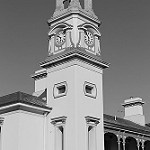

326


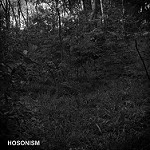

137


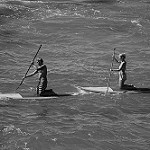

383


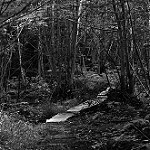

4


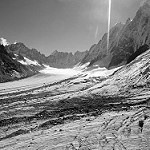

In [ ]:
# File and directory paths
csv_file_path = '/content/drive/My Drive/processed_prompts_all.csv'
save_directory = '/content/drive/My Drive/Reconstructed Images'

# Process and handle images from the CSV
process_images_from_csv(csv_file_path, save_directory)


In [ ]:

# Zip the contents of the specified folder
def zip_directory(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create a proper path relative to the folder being zipped
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(folder_path))
                # Add file to the zip file
                zipf.write(file_path, arcname=arcname)
# Path to the folder you want to zip
folder_path = '/content/drive/My Drive/Reconstructed Images'
# Path where the zip file will be saved
output_path = '/content/drive/My Drive/reconstructed_images.zip'

# Zip the folder
zip_directory(folder_path, output_path)


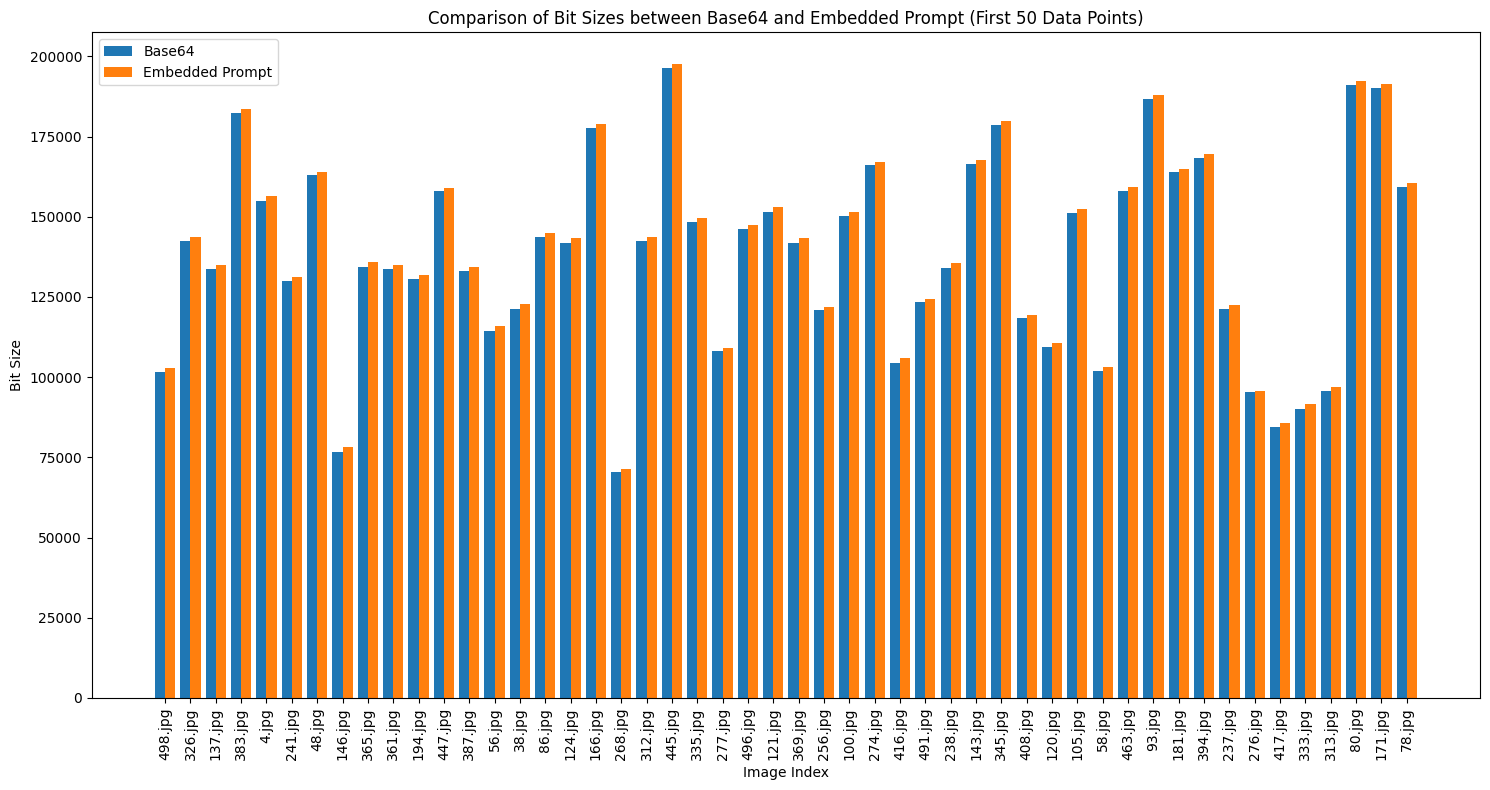

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import base64

# Read the CSV file
df = pd.read_csv('/content/drive/My Drive/processed_prompts_all.csv')

# Select only the first 50 data points
df = df.head(50)

# Calculate the bit size of each text in base64 and the embedded prompt
base64_bit_size = df['Base64'].apply(lambda x: len(x) * 8)  # Each character in base64 uses 8 bits
embedded_bit_size = df['Embedded Prompt'].apply(lambda x: len(x.encode('utf-8')) * 8)  # Convert to bytes and multiply by 8 to get bits

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(df.index, base64_bit_size, width=0.4, label='Base64')
plt.bar(df.index + 0.4, embedded_bit_size, width=0.4, label='Embedded Prompt')
plt.title('Comparison of Bit Sizes between Base64 and Embedded Prompt (First 50 Data Points)')
plt.xlabel('Image Index')
plt.ylabel('Bit Size')
plt.xticks(df.index + 0.2, df['Image Name'], rotation=90)
plt.legend()
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('bit_size_comparison.pdf')

# Show the plot
plt.show()